Capstone Project: DDoS Detection (Module 20)
===============================
This notebook is part of the Capstone Project for the course Emeritus Ar. The project aims to build a machine learning model to detect Distributed Denial of Service (DDoS) attacks in network traffic data using the CTU-13 dataset. This notebook will focus on the code implementation. The final report will include more detailed explanations, visualizations and citations. A detailed log of the code execution can be found in the [analysis log](./logs/analysis.log).



### SPEECH SYNTHESIS FUNCTION

In [113]:
import pyttsx3

def speak_message(message):
    engine = pyttsx3.init()
    engine.say(message)
    engine.runAndWait()

### SECTION 0: LOGGING SETUP

In [114]:
import logging
import os

# Ensure the 'logs' folder exists
os.makedirs("logs", exist_ok=True)

# Configure logging
logger = logging.getLogger(__name__)
logger.setLevel(logging.INFO)

# Use a fixed log file name in the 'logs' directory
log_filename = "logs/analysis.log"

# Delete the existing log file if it exists
if os.path.exists(log_filename):
    os.remove(log_filename)

# Create a new file handler
file_handler = logging.FileHandler(log_filename)
file_handler.setLevel(logging.INFO)

# Create console handler
console_handler = logging.StreamHandler()
console_handler.setLevel(logging.INFO)

# Define logging format
formatter = logging.Formatter('%(asctime)s - %(name)s - %(levelname)s - %(message)s')
file_handler.setFormatter(formatter)
console_handler.setFormatter(formatter)

# Add handlers to logger
logger.addHandler(file_handler)
logger.addHandler(console_handler)

logger.info("SECTION 0: LOGGING SETUP\n")

2025-01-04 03:56:49,536 - __main__ - INFO - SECTION 0: LOGGING SETUP

2025-01-04 03:56:49,536 - __main__ - INFO - SECTION 0: LOGGING SETUP

2025-01-04 03:56:49,536 - __main__ - INFO - SECTION 0: LOGGING SETUP

2025-01-04 03:56:49,536 - __main__ - INFO - SECTION 0: LOGGING SETUP

2025-01-04 03:56:49,536 - __main__ - INFO - SECTION 0: LOGGING SETUP

2025-01-04 03:56:49,536 - __main__ - INFO - SECTION 0: LOGGING SETUP

2025-01-04 03:56:49,536 - __main__ - INFO - SECTION 0: LOGGING SETUP

2025-01-04 03:56:49,536 - __main__ - INFO - SECTION 0: LOGGING SETUP

2025-01-04 03:56:49,536 - __main__ - INFO - SECTION 0: LOGGING SETUP

2025-01-04 03:56:49,536 - __main__ - INFO - SECTION 0: LOGGING SETUP

2025-01-04 03:56:49,536 - __main__ - INFO - SECTION 0: LOGGING SETUP

2025-01-04 03:56:49,536 - __main__ - INFO - SECTION 0: LOGGING SETUP



## SECTION 1 IMPORT LIBRARIES & GLOBAL VARIABLES</h4>

In [115]:
logger.info("\n\nSECTION 1: IMPORT LIBRARIES & GLOBAL VARIABLES\n")

# Standard Libraries
import io
import time

# Third-Party Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Scikit-Learn Libraries
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc

# Estimators
from sklearn.ensemble import (
    RandomForestClassifier,
    GradientBoostingClassifier
)
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

# Global variables
RANDOM_STATE = 42
TEST_SIZE = 0.2

2025-01-04 03:56:49,564 - __main__ - INFO - 

SECTION 1: IMPORT LIBRARIES & GLOBAL VARIABLES

2025-01-04 03:56:49,564 - __main__ - INFO - 

SECTION 1: IMPORT LIBRARIES & GLOBAL VARIABLES

2025-01-04 03:56:49,564 - __main__ - INFO - 

SECTION 1: IMPORT LIBRARIES & GLOBAL VARIABLES

2025-01-04 03:56:49,564 - __main__ - INFO - 

SECTION 1: IMPORT LIBRARIES & GLOBAL VARIABLES

2025-01-04 03:56:49,564 - __main__ - INFO - 

SECTION 1: IMPORT LIBRARIES & GLOBAL VARIABLES

2025-01-04 03:56:49,564 - __main__ - INFO - 

SECTION 1: IMPORT LIBRARIES & GLOBAL VARIABLES

2025-01-04 03:56:49,564 - __main__ - INFO - 

SECTION 1: IMPORT LIBRARIES & GLOBAL VARIABLES

2025-01-04 03:56:49,564 - __main__ - INFO - 

SECTION 1: IMPORT LIBRARIES & GLOBAL VARIABLES

2025-01-04 03:56:49,564 - __main__ - INFO - 

SECTION 1: IMPORT LIBRARIES & GLOBAL VARIABLES

2025-01-04 03:56:49,564 - __main__ - INFO - 

SECTION 1: IMPORT LIBRARIES & GLOBAL VARIABLES

2025-01-04 03:56:49,564 - __main__ - INFO - 

SECTION 1: IMP

### SECTION 2: LOAD AND EXPLORE DATA
---

In [116]:
logger.info("\n\nSECTION 2: LOAD & EXPLORE DATA\n")

# Load the dataset
file_path = "data/11-Rbot-20110818-2.binetflow.csv"

try:
    df = pd.read_csv(file_path)
    logger.info(f"Successfully loaded DataFrame with shape: {df.shape}")
except FileNotFoundError:
    logger.error("File not found. Please check the path.")
    raise

# Display a sample of the DataFrame in logs
logger.info("Sample rows of the DataFrame:")
logger.info(f"\n\n{df.head().to_markdown()}\n")

# DataFrame info
logger.info("Data types:")
buf = io.StringIO()
df.info(buf=buf)
info_str = buf.getvalue()
logger.info(f"\n```\n{info_str}\n```")

2025-01-04 03:56:49,585 - __main__ - INFO - 

SECTION 2: LOAD & EXPLORE DATA

2025-01-04 03:56:49,585 - __main__ - INFO - 

SECTION 2: LOAD & EXPLORE DATA

2025-01-04 03:56:49,585 - __main__ - INFO - 

SECTION 2: LOAD & EXPLORE DATA

2025-01-04 03:56:49,585 - __main__ - INFO - 

SECTION 2: LOAD & EXPLORE DATA

2025-01-04 03:56:49,585 - __main__ - INFO - 

SECTION 2: LOAD & EXPLORE DATA

2025-01-04 03:56:49,585 - __main__ - INFO - 

SECTION 2: LOAD & EXPLORE DATA

2025-01-04 03:56:49,585 - __main__ - INFO - 

SECTION 2: LOAD & EXPLORE DATA

2025-01-04 03:56:49,585 - __main__ - INFO - 

SECTION 2: LOAD & EXPLORE DATA

2025-01-04 03:56:49,585 - __main__ - INFO - 

SECTION 2: LOAD & EXPLORE DATA

2025-01-04 03:56:49,585 - __main__ - INFO - 

SECTION 2: LOAD & EXPLORE DATA

2025-01-04 03:56:49,585 - __main__ - INFO - 

SECTION 2: LOAD & EXPLORE DATA

2025-01-04 03:56:49,585 - __main__ - INFO - 

SECTION 2: LOAD & EXPLORE DATA

2025-01-04 03:56:49,687 - __main__ - INFO - Successfully loaded 

### SECTION 3: BASIC DATA CLEANING & FEATURE ENGINEERING
---

In [117]:
logger.info("\n\nSECTION 3: BASIC DATA CLEANING & FEATURE ENGINEERING\n")

# 1. Remove rows containing the word 'Background' in the Label
if 'Label' in df.columns:
    df = df[~df['Label'].str.contains('Background', case=False, na=False)]

    # 2. Create new column, 'Botnet'
    df['Botnet'] = df['Label'].apply(
        lambda x: 1 if 'botnet' in str(x).lower() else 0
    )

    # 3. Drop the original 'Label' column
    df.drop(columns=['Label'], inplace=True)
else:
    logger.warning("No 'Label' column found. Modify label handling as appropriate.")

# 4. Drop sTos, dTos, and StartTime
cols_to_remove = ['sTos', 'dTos', 'StartTime']
for col in cols_to_remove:
    if col in df.columns:
        df.drop(columns=[col], inplace=True)

# 5. Safe division helper to avoid ZeroDivisionError
def safe_divide(num, denom):
    return num / denom if denom != 0 else 0

# 6. Create BytesPerSecond & PktsPerSecond
df['BytesPerSecond'] = df.apply(lambda row: safe_divide(row['TotBytes'], row['Dur']), axis=1)
df['PktsPerSecond'] = df.apply(lambda row: safe_divide(row['TotPkts'], row['Dur']), axis=1)

# 7. Address entropy function
import math
from collections import Counter

def address_entropy(addr):
    addr_str = str(addr)
    count = Counter(addr_str)
    total_chars = len(addr_str)
    if total_chars < 2:
        return 0
    entropy_value = 0
    for char_count in count.values():
        p = char_count / total_chars
        entropy_value -= p * math.log2(p)
    return entropy_value

df['SrcAddrEntropy'] = df['SrcAddr'].apply(address_entropy)
df['DstAddrEntropy'] = df['DstAddr'].apply(address_entropy)

# 8. Convert Sport, Dport to range categories, then drop original columns
def get_port_range(x):
    try:
        port = int(x)
    except:
        return 'Unknown'
    if 0 <= port <= 1023:
        return 'WellKnown'
    elif 1024 <= port <= 49151:
        return 'Registered'
    elif 49152 <= port <= 65535:
        return 'Ephemeral'
    else:
        return 'Unknown'

if 'Sport' in df.columns:
    df['SportRange'] = df['Sport'].apply(get_port_range)
    df.drop(columns=['Sport'], inplace=True)

if 'Dport' in df.columns:
    df['DportRange'] = df['Dport'].apply(get_port_range)
    df.drop(columns=['Dport'], inplace=True)

# 9. Main columns plus engineered columns
main_features = [
    'Dur', 'Proto', 'Dir', 'State',
    'SrcAddr', 'DstAddr',
    'SportRange', 'DportRange',
    'TotPkts', 'TotBytes', 'SrcBytes',
    'BytesPerSecond', 'PktsPerSecond',
    'SrcAddrEntropy', 'DstAddrEntropy',
    'Botnet'
]

df = df[[col for col in main_features if col in df.columns]]

# 10. Prepare X and y
if 'Botnet' in df.columns:
    y = df['Botnet']
    X = df.drop('Botnet', axis=1)
    logger.info(f"Feature matrix shape: {X.shape}, Target vector shape: {y.shape}")
else:
    logger.error("No 'Botnet' column identified for classification. Exiting.")
    raise ValueError("Botnet column not found")

# Drop original IP columns from X
if 'SrcAddr' in X.columns:
    X.drop(columns=['SrcAddr'], inplace=True)
if 'DstAddr' in X.columns:
    X.drop(columns=['DstAddr'], inplace=True)

# Label-encode remaining string columns
categorical_cols = ['Proto', 'Dir', 'State', 'SportRange', 'DportRange']
for cat_col in categorical_cols:
    if cat_col in X.columns and X[cat_col].dtype == 'object':
        X[cat_col] = X[cat_col].astype('category').cat.codes

logger.info("Showing the first few rows of the engineered DataFrame:")
logger.info(f"\n\n{df.head().to_markdown()}\n")

# 12. Data types after feature engineering
import io
buf = io.StringIO()
df.info(buf=buf)
info_str = buf.getvalue()
logger.info(f"\n\n{info_str}\n")

2025-01-04 03:56:49,733 - __main__ - INFO - 

SECTION 3: BASIC DATA CLEANING & FEATURE ENGINEERING

2025-01-04 03:56:49,733 - __main__ - INFO - 

SECTION 3: BASIC DATA CLEANING & FEATURE ENGINEERING

2025-01-04 03:56:49,733 - __main__ - INFO - 

SECTION 3: BASIC DATA CLEANING & FEATURE ENGINEERING

2025-01-04 03:56:49,733 - __main__ - INFO - 

SECTION 3: BASIC DATA CLEANING & FEATURE ENGINEERING

2025-01-04 03:56:49,733 - __main__ - INFO - 

SECTION 3: BASIC DATA CLEANING & FEATURE ENGINEERING

2025-01-04 03:56:49,733 - __main__ - INFO - 

SECTION 3: BASIC DATA CLEANING & FEATURE ENGINEERING

2025-01-04 03:56:49,733 - __main__ - INFO - 

SECTION 3: BASIC DATA CLEANING & FEATURE ENGINEERING

2025-01-04 03:56:49,733 - __main__ - INFO - 

SECTION 3: BASIC DATA CLEANING & FEATURE ENGINEERING

2025-01-04 03:56:49,733 - __main__ - INFO - 

SECTION 3: BASIC DATA CLEANING & FEATURE ENGINEERING

2025-01-04 03:56:49,733 - __main__ - INFO - 

SECTION 3: BASIC DATA CLEANING & FEATURE ENGINEERING



### SECTION 4: VISUALIZATIONS OF TRAFFIC PATTERNS
---

2025-01-04 03:56:49,877 - __main__ - INFO - 

SECTION 4: VISUALIZATIONS

2025-01-04 03:56:49,877 - __main__ - INFO - 

SECTION 4: VISUALIZATIONS

2025-01-04 03:56:49,877 - __main__ - INFO - 

SECTION 4: VISUALIZATIONS

2025-01-04 03:56:49,877 - __main__ - INFO - 

SECTION 4: VISUALIZATIONS

2025-01-04 03:56:49,877 - __main__ - INFO - 

SECTION 4: VISUALIZATIONS

2025-01-04 03:56:49,877 - __main__ - INFO - 

SECTION 4: VISUALIZATIONS

2025-01-04 03:56:49,877 - __main__ - INFO - 

SECTION 4: VISUALIZATIONS

2025-01-04 03:56:49,877 - __main__ - INFO - 

SECTION 4: VISUALIZATIONS

2025-01-04 03:56:49,877 - __main__ - INFO - 

SECTION 4: VISUALIZATIONS

2025-01-04 03:56:49,877 - __main__ - INFO - 

SECTION 4: VISUALIZATIONS

2025-01-04 03:56:49,877 - __main__ - INFO - 

SECTION 4: VISUALIZATIONS

2025-01-04 03:56:49,877 - __main__ - INFO - 

SECTION 4: VISUALIZATIONS

2025-01-04 03:56:49,880 - __main__ - INFO - Creating basic visualizations...
2025-01-04 03:56:49,880 - __main__ - INFO - Cre

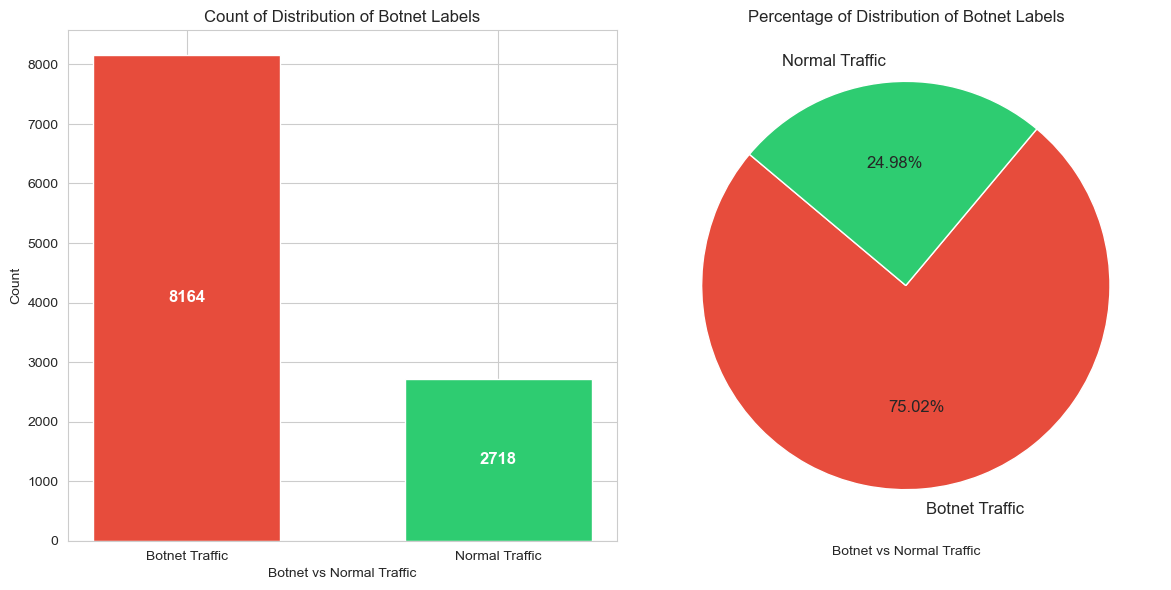

2025-01-04 03:56:50,640 - __main__ - INFO - Correlation heatmap saved to plots/correlation_heatmap.png
2025-01-04 03:56:50,640 - __main__ - INFO - Correlation heatmap saved to plots/correlation_heatmap.png
2025-01-04 03:56:50,640 - __main__ - INFO - Correlation heatmap saved to plots/correlation_heatmap.png
2025-01-04 03:56:50,640 - __main__ - INFO - Correlation heatmap saved to plots/correlation_heatmap.png
2025-01-04 03:56:50,640 - __main__ - INFO - Correlation heatmap saved to plots/correlation_heatmap.png
2025-01-04 03:56:50,640 - __main__ - INFO - Correlation heatmap saved to plots/correlation_heatmap.png
2025-01-04 03:56:50,640 - __main__ - INFO - Correlation heatmap saved to plots/correlation_heatmap.png
2025-01-04 03:56:50,640 - __main__ - INFO - Correlation heatmap saved to plots/correlation_heatmap.png
2025-01-04 03:56:50,640 - __main__ - INFO - Correlation heatmap saved to plots/correlation_heatmap.png
2025-01-04 03:56:50,640 - __main__ - INFO - Correlation heatmap saved to 

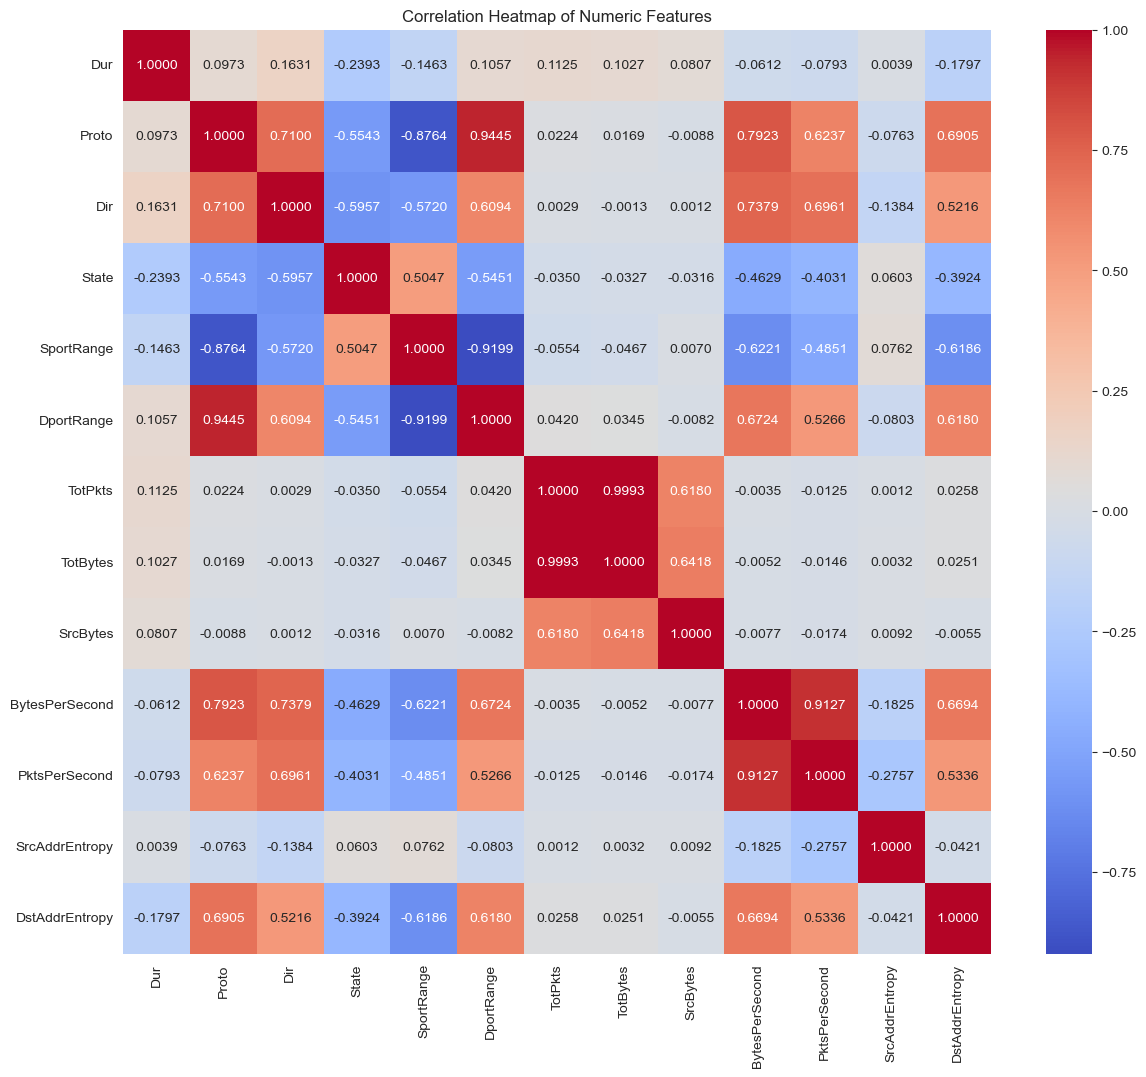

In [118]:
logger.info("\n\nSECTION 4: VISUALIZATIONS\n")

logger.info("Creating basic visualizations...")

# Ensure 'plots' directory exists
os.makedirs("plots", exist_ok=True)

# 1. Bar & Pie Chart of Botnet vs Normal Traffic
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

# Convert 0 -> "Normal Traffic", 1 -> "Botnet Traffic"
counts = y.value_counts()
labels_map = {0: "Normal Traffic", 1: "Botnet Traffic"}

# Convert to lists
plot_labels = [labels_map.get(idx, str(idx)) for idx in counts.index]
plot_values = counts.values

# Define colors
color_map = {
    "Normal Traffic": "#2ecc71",
    "Botnet Traffic": "#e74c3c"
}
bar_colors = [color_map[label] for label in plot_labels]

# Create the bar chart (axes[0])
axes[0].bar(
    plot_labels,
    plot_values,
    color=bar_colors,
    width=0.6
)

# Add text inside each bar
for i, v in enumerate(plot_values):
    axes[0].text(
        i,
        v / 2,
        str(v),
        ha='center',
        va='center',
        color='white',
        fontweight='bold',
        fontsize=12
    )

axes[0].set_title("Count of Distribution of Botnet Labels")
axes[0].set_xlabel("Botnet vs Normal Traffic")
axes[0].set_ylabel("Count")

# Pie chart (axes[1])
axes[1].pie(
    plot_values,
    labels=plot_labels,
    colors=bar_colors,
    autopct='%1.2f%%',
    startangle=140,
    textprops={'fontsize': 12}
)
axes[1].set_title("Percentage of Distribution of Botnet Labels")
axes[1].set_xlabel("Botnet vs Normal Traffic")

plt.tight_layout()

# Save this figure to 'plots' folder
bar_pie_filename = os.path.join("plots", "botnet_distribution.png")
plt.savefig(bar_pie_filename, dpi=300)
logger.info(f"Bar/Pie chart figure saved to {bar_pie_filename}")

plt.show()

# 2. Correlation Heatmap of Numeric Features
X_numeric = X.select_dtypes(include=[np.number])

if (X_numeric.shape[0] > 1) and (X_numeric.shape[1] > 1):
    correlation_matrix = X_numeric.corr()
    plt.figure(figsize=(14, 12))
    sns.heatmap(correlation_matrix, cmap='coolwarm', annot=True, fmt=".4f")
    plt.title("Correlation Heatmap of Numeric Features")

    # Save the heatmap figure
    heatmap_filename = os.path.join("plots", "correlation_heatmap.png")
    plt.savefig(heatmap_filename, dpi=300)
    logger.info(f"Correlation heatmap saved to {heatmap_filename}")

    plt.show()
else:
    logger.warning(
        f"Skipping correlation heatmap. "
        f"X_numeric has shape {X_numeric.shape}, needs at least 2 rows & 2 columns."
    )

### SECTION 5: TRAIN-TEST SPLIT AND PIPELINE DEFINITION
---

2025-01-04 03:56:50,800 - __main__ - INFO - 

SECTION 5: TRAIN-TEST SPLIT AND MULTI-MODEL PIPELINE

2025-01-04 03:56:50,800 - __main__ - INFO - 

SECTION 5: TRAIN-TEST SPLIT AND MULTI-MODEL PIPELINE

2025-01-04 03:56:50,800 - __main__ - INFO - 

SECTION 5: TRAIN-TEST SPLIT AND MULTI-MODEL PIPELINE

2025-01-04 03:56:50,800 - __main__ - INFO - 

SECTION 5: TRAIN-TEST SPLIT AND MULTI-MODEL PIPELINE

2025-01-04 03:56:50,800 - __main__ - INFO - 

SECTION 5: TRAIN-TEST SPLIT AND MULTI-MODEL PIPELINE

2025-01-04 03:56:50,800 - __main__ - INFO - 

SECTION 5: TRAIN-TEST SPLIT AND MULTI-MODEL PIPELINE

2025-01-04 03:56:50,800 - __main__ - INFO - 

SECTION 5: TRAIN-TEST SPLIT AND MULTI-MODEL PIPELINE

2025-01-04 03:56:50,800 - __main__ - INFO - 

SECTION 5: TRAIN-TEST SPLIT AND MULTI-MODEL PIPELINE

2025-01-04 03:56:50,800 - __main__ - INFO - 

SECTION 5: TRAIN-TEST SPLIT AND MULTI-MODEL PIPELINE

2025-01-04 03:56:50,800 - __main__ - INFO - 

SECTION 5: TRAIN-TEST SPLIT AND MULTI-MODEL PIPELINE



Fitting 5 folds for each of 16 candidates, totalling 80 fits


2025-01-04 03:56:52,964 - __main__ - INFO - RandomForest -> Training time: 2.15 seconds
2025-01-04 03:56:52,964 - __main__ - INFO - RandomForest -> Training time: 2.15 seconds
2025-01-04 03:56:52,964 - __main__ - INFO - RandomForest -> Training time: 2.15 seconds
2025-01-04 03:56:52,964 - __main__ - INFO - RandomForest -> Training time: 2.15 seconds
2025-01-04 03:56:52,964 - __main__ - INFO - RandomForest -> Training time: 2.15 seconds
2025-01-04 03:56:52,964 - __main__ - INFO - RandomForest -> Training time: 2.15 seconds
2025-01-04 03:56:52,964 - __main__ - INFO - RandomForest -> Training time: 2.15 seconds
2025-01-04 03:56:52,964 - __main__ - INFO - RandomForest -> Training time: 2.15 seconds
2025-01-04 03:56:52,964 - __main__ - INFO - RandomForest -> Training time: 2.15 seconds
2025-01-04 03:56:52,964 - __main__ - INFO - RandomForest -> Training time: 2.15 seconds
2025-01-04 03:56:52,964 - __main__ - INFO - RandomForest -> Training time: 2.15 seconds
2025-01-04 03:56:52,964 - __main

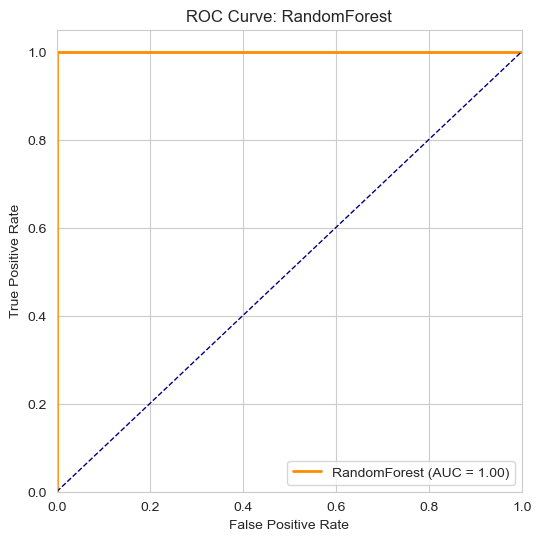

2025-01-04 03:56:53,168 - __main__ - INFO - ROC curve saved to plots/roc_RandomForest.png
2025-01-04 03:56:53,168 - __main__ - INFO - ROC curve saved to plots/roc_RandomForest.png
2025-01-04 03:56:53,168 - __main__ - INFO - ROC curve saved to plots/roc_RandomForest.png
2025-01-04 03:56:53,168 - __main__ - INFO - ROC curve saved to plots/roc_RandomForest.png
2025-01-04 03:56:53,168 - __main__ - INFO - ROC curve saved to plots/roc_RandomForest.png
2025-01-04 03:56:53,168 - __main__ - INFO - ROC curve saved to plots/roc_RandomForest.png
2025-01-04 03:56:53,168 - __main__ - INFO - ROC curve saved to plots/roc_RandomForest.png
2025-01-04 03:56:53,168 - __main__ - INFO - ROC curve saved to plots/roc_RandomForest.png
2025-01-04 03:56:53,168 - __main__ - INFO - ROC curve saved to plots/roc_RandomForest.png
2025-01-04 03:56:53,168 - __main__ - INFO - ROC curve saved to plots/roc_RandomForest.png
2025-01-04 03:56:53,168 - __main__ - INFO - ROC curve saved to plots/roc_RandomForest.png
2025-01-04

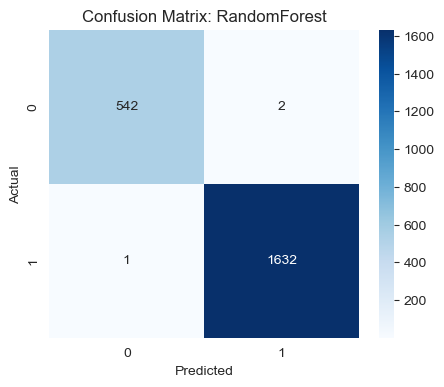

2025-01-04 03:56:53,317 - __main__ - INFO - Confusion matrix saved to plots/confusion_matrix_RandomForest.png
2025-01-04 03:56:53,317 - __main__ - INFO - Confusion matrix saved to plots/confusion_matrix_RandomForest.png
2025-01-04 03:56:53,317 - __main__ - INFO - Confusion matrix saved to plots/confusion_matrix_RandomForest.png
2025-01-04 03:56:53,317 - __main__ - INFO - Confusion matrix saved to plots/confusion_matrix_RandomForest.png
2025-01-04 03:56:53,317 - __main__ - INFO - Confusion matrix saved to plots/confusion_matrix_RandomForest.png
2025-01-04 03:56:53,317 - __main__ - INFO - Confusion matrix saved to plots/confusion_matrix_RandomForest.png
2025-01-04 03:56:53,317 - __main__ - INFO - Confusion matrix saved to plots/confusion_matrix_RandomForest.png
2025-01-04 03:56:53,317 - __main__ - INFO - Confusion matrix saved to plots/confusion_matrix_RandomForest.png
2025-01-04 03:56:53,317 - __main__ - INFO - Confusion matrix saved to plots/confusion_matrix_RandomForest.png
2025-01-04

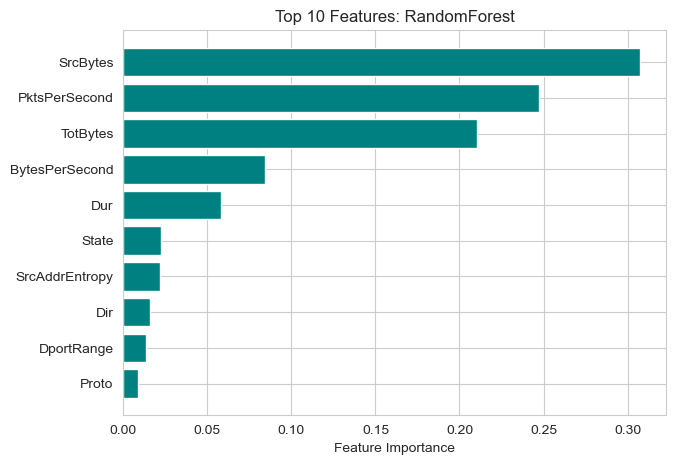

2025-01-04 03:56:53,506 - __main__ - INFO - Top 10 features bar chart saved to plots/top10_features_RandomForest.png
2025-01-04 03:56:53,506 - __main__ - INFO - Top 10 features bar chart saved to plots/top10_features_RandomForest.png
2025-01-04 03:56:53,506 - __main__ - INFO - Top 10 features bar chart saved to plots/top10_features_RandomForest.png
2025-01-04 03:56:53,506 - __main__ - INFO - Top 10 features bar chart saved to plots/top10_features_RandomForest.png
2025-01-04 03:56:53,506 - __main__ - INFO - Top 10 features bar chart saved to plots/top10_features_RandomForest.png
2025-01-04 03:56:53,506 - __main__ - INFO - Top 10 features bar chart saved to plots/top10_features_RandomForest.png
2025-01-04 03:56:53,506 - __main__ - INFO - Top 10 features bar chart saved to plots/top10_features_RandomForest.png
2025-01-04 03:56:53,506 - __main__ - INFO - Top 10 features bar chart saved to plots/top10_features_RandomForest.png
2025-01-04 03:56:53,506 - __main__ - INFO - Top 10 features bar 

Fitting 5 folds for each of 12 candidates, totalling 60 fits


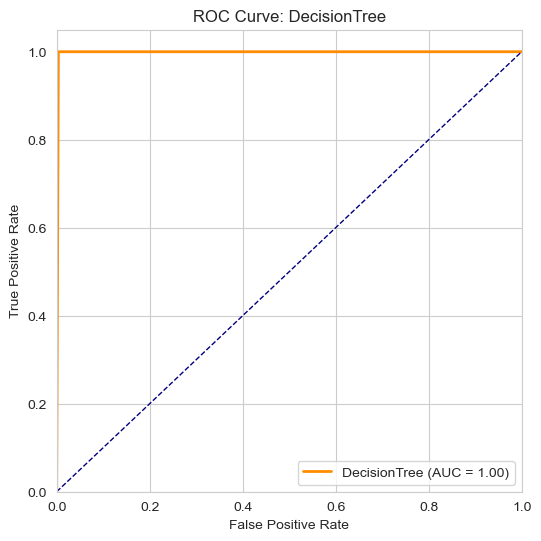

2025-01-04 03:56:53,810 - __main__ - INFO - ROC curve saved to plots/roc_DecisionTree.png
2025-01-04 03:56:53,810 - __main__ - INFO - ROC curve saved to plots/roc_DecisionTree.png
2025-01-04 03:56:53,810 - __main__ - INFO - ROC curve saved to plots/roc_DecisionTree.png
2025-01-04 03:56:53,810 - __main__ - INFO - ROC curve saved to plots/roc_DecisionTree.png
2025-01-04 03:56:53,810 - __main__ - INFO - ROC curve saved to plots/roc_DecisionTree.png
2025-01-04 03:56:53,810 - __main__ - INFO - ROC curve saved to plots/roc_DecisionTree.png
2025-01-04 03:56:53,810 - __main__ - INFO - ROC curve saved to plots/roc_DecisionTree.png
2025-01-04 03:56:53,810 - __main__ - INFO - ROC curve saved to plots/roc_DecisionTree.png
2025-01-04 03:56:53,810 - __main__ - INFO - ROC curve saved to plots/roc_DecisionTree.png
2025-01-04 03:56:53,810 - __main__ - INFO - ROC curve saved to plots/roc_DecisionTree.png
2025-01-04 03:56:53,810 - __main__ - INFO - ROC curve saved to plots/roc_DecisionTree.png
2025-01-04

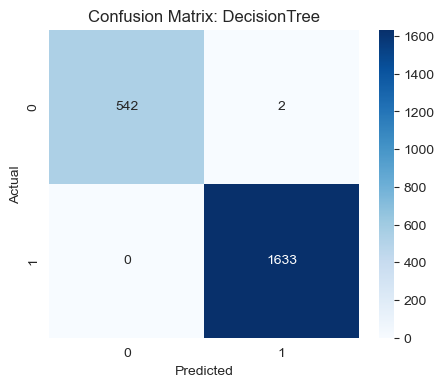

2025-01-04 03:56:53,920 - __main__ - INFO - Confusion matrix saved to plots/confusion_matrix_DecisionTree.png
2025-01-04 03:56:53,920 - __main__ - INFO - Confusion matrix saved to plots/confusion_matrix_DecisionTree.png
2025-01-04 03:56:53,920 - __main__ - INFO - Confusion matrix saved to plots/confusion_matrix_DecisionTree.png
2025-01-04 03:56:53,920 - __main__ - INFO - Confusion matrix saved to plots/confusion_matrix_DecisionTree.png
2025-01-04 03:56:53,920 - __main__ - INFO - Confusion matrix saved to plots/confusion_matrix_DecisionTree.png
2025-01-04 03:56:53,920 - __main__ - INFO - Confusion matrix saved to plots/confusion_matrix_DecisionTree.png
2025-01-04 03:56:53,920 - __main__ - INFO - Confusion matrix saved to plots/confusion_matrix_DecisionTree.png
2025-01-04 03:56:53,920 - __main__ - INFO - Confusion matrix saved to plots/confusion_matrix_DecisionTree.png
2025-01-04 03:56:53,920 - __main__ - INFO - Confusion matrix saved to plots/confusion_matrix_DecisionTree.png
2025-01-04

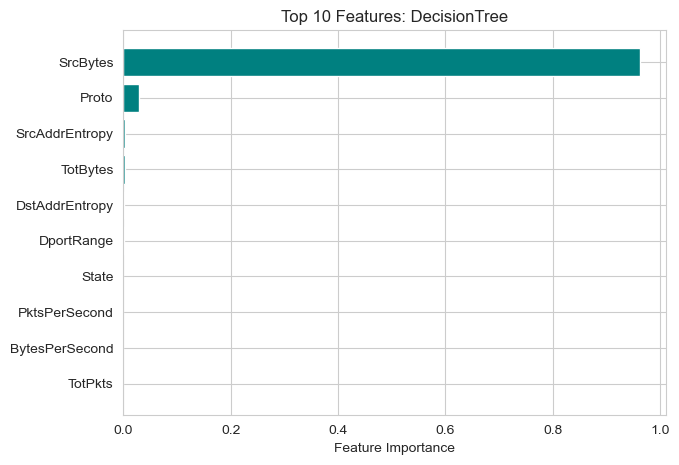

2025-01-04 03:56:54,094 - __main__ - INFO - Top 10 features bar chart saved to plots/top10_features_DecisionTree.png
2025-01-04 03:56:54,094 - __main__ - INFO - Top 10 features bar chart saved to plots/top10_features_DecisionTree.png
2025-01-04 03:56:54,094 - __main__ - INFO - Top 10 features bar chart saved to plots/top10_features_DecisionTree.png
2025-01-04 03:56:54,094 - __main__ - INFO - Top 10 features bar chart saved to plots/top10_features_DecisionTree.png
2025-01-04 03:56:54,094 - __main__ - INFO - Top 10 features bar chart saved to plots/top10_features_DecisionTree.png
2025-01-04 03:56:54,094 - __main__ - INFO - Top 10 features bar chart saved to plots/top10_features_DecisionTree.png
2025-01-04 03:56:54,094 - __main__ - INFO - Top 10 features bar chart saved to plots/top10_features_DecisionTree.png
2025-01-04 03:56:54,094 - __main__ - INFO - Top 10 features bar chart saved to plots/top10_features_DecisionTree.png
2025-01-04 03:56:54,094 - __main__ - INFO - Top 10 features bar 

Fitting 5 folds for each of 3 candidates, totalling 15 fits


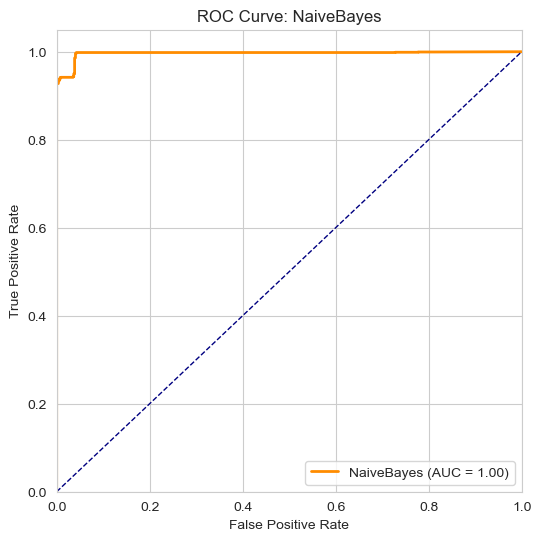

2025-01-04 03:56:54,326 - __main__ - INFO - ROC curve saved to plots/roc_NaiveBayes.png
2025-01-04 03:56:54,326 - __main__ - INFO - ROC curve saved to plots/roc_NaiveBayes.png
2025-01-04 03:56:54,326 - __main__ - INFO - ROC curve saved to plots/roc_NaiveBayes.png
2025-01-04 03:56:54,326 - __main__ - INFO - ROC curve saved to plots/roc_NaiveBayes.png
2025-01-04 03:56:54,326 - __main__ - INFO - ROC curve saved to plots/roc_NaiveBayes.png
2025-01-04 03:56:54,326 - __main__ - INFO - ROC curve saved to plots/roc_NaiveBayes.png
2025-01-04 03:56:54,326 - __main__ - INFO - ROC curve saved to plots/roc_NaiveBayes.png
2025-01-04 03:56:54,326 - __main__ - INFO - ROC curve saved to plots/roc_NaiveBayes.png
2025-01-04 03:56:54,326 - __main__ - INFO - ROC curve saved to plots/roc_NaiveBayes.png
2025-01-04 03:56:54,326 - __main__ - INFO - ROC curve saved to plots/roc_NaiveBayes.png
2025-01-04 03:56:54,326 - __main__ - INFO - ROC curve saved to plots/roc_NaiveBayes.png
2025-01-04 03:56:54,326 - __main

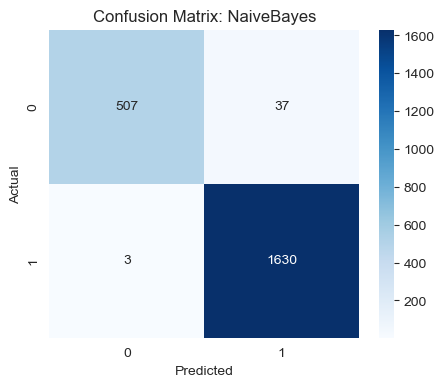

2025-01-04 03:56:54,436 - __main__ - INFO - Confusion matrix saved to plots/confusion_matrix_NaiveBayes.png
2025-01-04 03:56:54,436 - __main__ - INFO - Confusion matrix saved to plots/confusion_matrix_NaiveBayes.png
2025-01-04 03:56:54,436 - __main__ - INFO - Confusion matrix saved to plots/confusion_matrix_NaiveBayes.png
2025-01-04 03:56:54,436 - __main__ - INFO - Confusion matrix saved to plots/confusion_matrix_NaiveBayes.png
2025-01-04 03:56:54,436 - __main__ - INFO - Confusion matrix saved to plots/confusion_matrix_NaiveBayes.png
2025-01-04 03:56:54,436 - __main__ - INFO - Confusion matrix saved to plots/confusion_matrix_NaiveBayes.png
2025-01-04 03:56:54,436 - __main__ - INFO - Confusion matrix saved to plots/confusion_matrix_NaiveBayes.png
2025-01-04 03:56:54,436 - __main__ - INFO - Confusion matrix saved to plots/confusion_matrix_NaiveBayes.png
2025-01-04 03:56:54,436 - __main__ - INFO - Confusion matrix saved to plots/confusion_matrix_NaiveBayes.png
2025-01-04 03:56:54,436 - __

Fitting 5 folds for each of 6 candidates, totalling 30 fits


2025-01-04 03:56:54,647 - __main__ - INFO - 
Classification Report for KNN:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       544
           1       1.00      1.00      1.00      1633

    accuracy                           1.00      2177
   macro avg       1.00      1.00      1.00      2177
weighted avg       1.00      1.00      1.00      2177

2025-01-04 03:56:54,647 - __main__ - INFO - 
Classification Report for KNN:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       544
           1       1.00      1.00      1.00      1633

    accuracy                           1.00      2177
   macro avg       1.00      1.00      1.00      2177
weighted avg       1.00      1.00      1.00      2177

2025-01-04 03:56:54,647 - __main__ - INFO - 
Classification Report for KNN:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       544
         

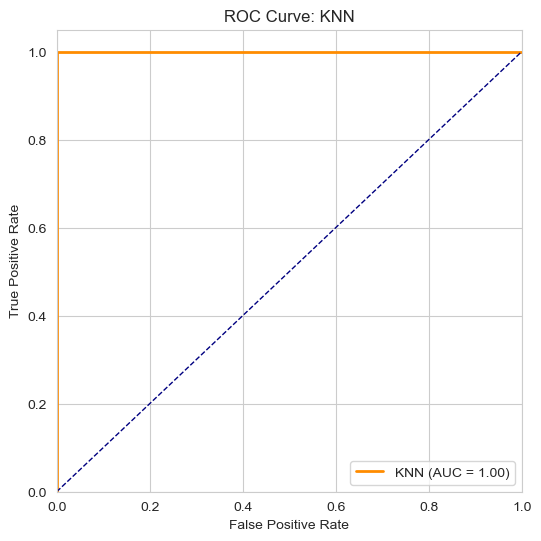

2025-01-04 03:56:54,850 - __main__ - INFO - ROC curve saved to plots/roc_KNN.png
2025-01-04 03:56:54,850 - __main__ - INFO - ROC curve saved to plots/roc_KNN.png
2025-01-04 03:56:54,850 - __main__ - INFO - ROC curve saved to plots/roc_KNN.png
2025-01-04 03:56:54,850 - __main__ - INFO - ROC curve saved to plots/roc_KNN.png
2025-01-04 03:56:54,850 - __main__ - INFO - ROC curve saved to plots/roc_KNN.png
2025-01-04 03:56:54,850 - __main__ - INFO - ROC curve saved to plots/roc_KNN.png
2025-01-04 03:56:54,850 - __main__ - INFO - ROC curve saved to plots/roc_KNN.png
2025-01-04 03:56:54,850 - __main__ - INFO - ROC curve saved to plots/roc_KNN.png
2025-01-04 03:56:54,850 - __main__ - INFO - ROC curve saved to plots/roc_KNN.png
2025-01-04 03:56:54,850 - __main__ - INFO - ROC curve saved to plots/roc_KNN.png
2025-01-04 03:56:54,850 - __main__ - INFO - ROC curve saved to plots/roc_KNN.png
2025-01-04 03:56:54,850 - __main__ - INFO - ROC curve saved to plots/roc_KNN.png


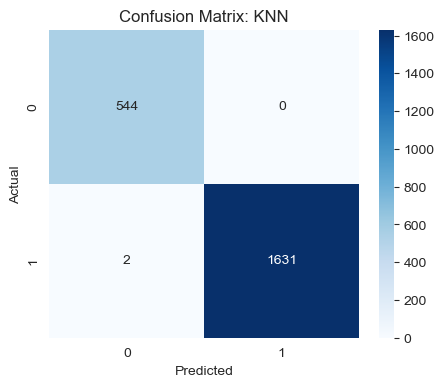

2025-01-04 03:56:54,956 - __main__ - INFO - Confusion matrix saved to plots/confusion_matrix_KNN.png
2025-01-04 03:56:54,956 - __main__ - INFO - Confusion matrix saved to plots/confusion_matrix_KNN.png
2025-01-04 03:56:54,956 - __main__ - INFO - Confusion matrix saved to plots/confusion_matrix_KNN.png
2025-01-04 03:56:54,956 - __main__ - INFO - Confusion matrix saved to plots/confusion_matrix_KNN.png
2025-01-04 03:56:54,956 - __main__ - INFO - Confusion matrix saved to plots/confusion_matrix_KNN.png
2025-01-04 03:56:54,956 - __main__ - INFO - Confusion matrix saved to plots/confusion_matrix_KNN.png
2025-01-04 03:56:54,956 - __main__ - INFO - Confusion matrix saved to plots/confusion_matrix_KNN.png
2025-01-04 03:56:54,956 - __main__ - INFO - Confusion matrix saved to plots/confusion_matrix_KNN.png
2025-01-04 03:56:54,956 - __main__ - INFO - Confusion matrix saved to plots/confusion_matrix_KNN.png
2025-01-04 03:56:54,956 - __main__ - INFO - Confusion matrix saved to plots/confusion_matri

Fitting 5 folds for each of 6 candidates, totalling 30 fits


2025-01-04 03:56:58,597 - __main__ - INFO - SVM -> Training time: 3.63 seconds
2025-01-04 03:56:58,597 - __main__ - INFO - SVM -> Training time: 3.63 seconds
2025-01-04 03:56:58,597 - __main__ - INFO - SVM -> Training time: 3.63 seconds
2025-01-04 03:56:58,597 - __main__ - INFO - SVM -> Training time: 3.63 seconds
2025-01-04 03:56:58,597 - __main__ - INFO - SVM -> Training time: 3.63 seconds
2025-01-04 03:56:58,597 - __main__ - INFO - SVM -> Training time: 3.63 seconds
2025-01-04 03:56:58,597 - __main__ - INFO - SVM -> Training time: 3.63 seconds
2025-01-04 03:56:58,597 - __main__ - INFO - SVM -> Training time: 3.63 seconds
2025-01-04 03:56:58,597 - __main__ - INFO - SVM -> Training time: 3.63 seconds
2025-01-04 03:56:58,597 - __main__ - INFO - SVM -> Training time: 3.63 seconds
2025-01-04 03:56:58,597 - __main__ - INFO - SVM -> Training time: 3.63 seconds
2025-01-04 03:56:58,597 - __main__ - INFO - SVM -> Training time: 3.63 seconds
2025-01-04 03:56:58,616 - __main__ - INFO - 
Classif

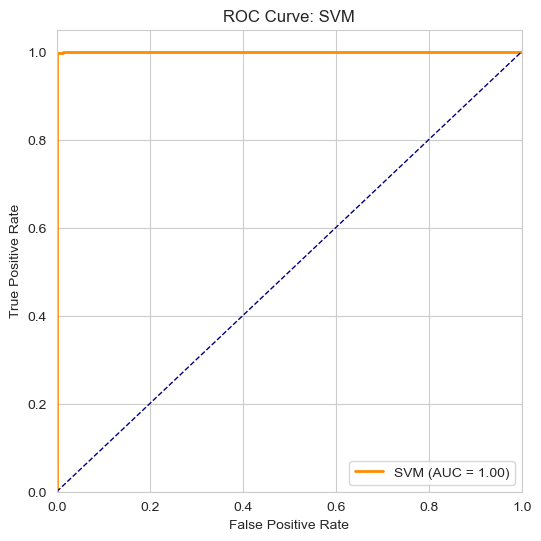

2025-01-04 03:56:58,798 - __main__ - INFO - ROC curve saved to plots/roc_SVM.png
2025-01-04 03:56:58,798 - __main__ - INFO - ROC curve saved to plots/roc_SVM.png
2025-01-04 03:56:58,798 - __main__ - INFO - ROC curve saved to plots/roc_SVM.png
2025-01-04 03:56:58,798 - __main__ - INFO - ROC curve saved to plots/roc_SVM.png
2025-01-04 03:56:58,798 - __main__ - INFO - ROC curve saved to plots/roc_SVM.png
2025-01-04 03:56:58,798 - __main__ - INFO - ROC curve saved to plots/roc_SVM.png
2025-01-04 03:56:58,798 - __main__ - INFO - ROC curve saved to plots/roc_SVM.png
2025-01-04 03:56:58,798 - __main__ - INFO - ROC curve saved to plots/roc_SVM.png
2025-01-04 03:56:58,798 - __main__ - INFO - ROC curve saved to plots/roc_SVM.png
2025-01-04 03:56:58,798 - __main__ - INFO - ROC curve saved to plots/roc_SVM.png
2025-01-04 03:56:58,798 - __main__ - INFO - ROC curve saved to plots/roc_SVM.png
2025-01-04 03:56:58,798 - __main__ - INFO - ROC curve saved to plots/roc_SVM.png


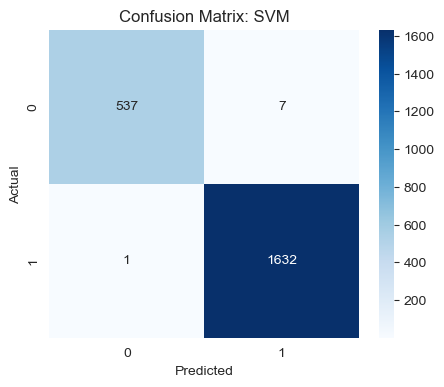

2025-01-04 03:56:58,905 - __main__ - INFO - Confusion matrix saved to plots/confusion_matrix_SVM.png
2025-01-04 03:56:58,905 - __main__ - INFO - Confusion matrix saved to plots/confusion_matrix_SVM.png
2025-01-04 03:56:58,905 - __main__ - INFO - Confusion matrix saved to plots/confusion_matrix_SVM.png
2025-01-04 03:56:58,905 - __main__ - INFO - Confusion matrix saved to plots/confusion_matrix_SVM.png
2025-01-04 03:56:58,905 - __main__ - INFO - Confusion matrix saved to plots/confusion_matrix_SVM.png
2025-01-04 03:56:58,905 - __main__ - INFO - Confusion matrix saved to plots/confusion_matrix_SVM.png
2025-01-04 03:56:58,905 - __main__ - INFO - Confusion matrix saved to plots/confusion_matrix_SVM.png
2025-01-04 03:56:58,905 - __main__ - INFO - Confusion matrix saved to plots/confusion_matrix_SVM.png
2025-01-04 03:56:58,905 - __main__ - INFO - Confusion matrix saved to plots/confusion_matrix_SVM.png
2025-01-04 03:56:58,905 - __main__ - INFO - Confusion matrix saved to plots/confusion_matri

Fitting 5 folds for each of 8 candidates, totalling 40 fits


/Users/mwstout/miniconda3/lib/python3.12/site-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/mwstout/miniconda3/lib/python3.12/site-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/mwstout/miniconda3/lib/python3.12/site-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/mwstout/miniconda3/lib/python3.12/site-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/mwstout/miniconda3/lib/python3.12/site-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/mwstout/miniconda3/lib/python3.12/site-packages/sklearn/svm/_base.py:1235

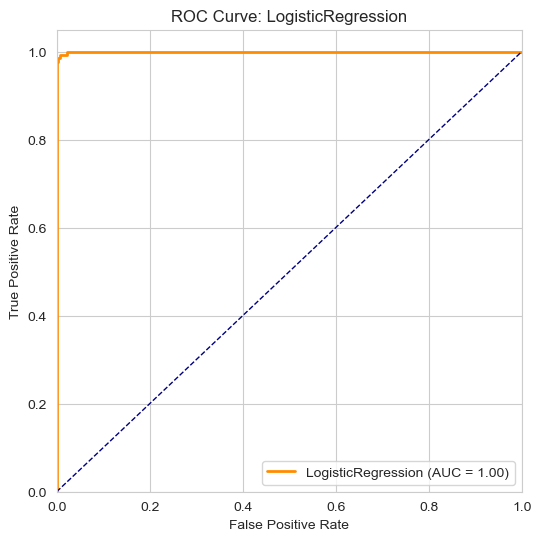

2025-01-04 03:57:20,194 - __main__ - INFO - ROC curve saved to plots/roc_LogisticRegression.png
2025-01-04 03:57:20,194 - __main__ - INFO - ROC curve saved to plots/roc_LogisticRegression.png
2025-01-04 03:57:20,194 - __main__ - INFO - ROC curve saved to plots/roc_LogisticRegression.png
2025-01-04 03:57:20,194 - __main__ - INFO - ROC curve saved to plots/roc_LogisticRegression.png
2025-01-04 03:57:20,194 - __main__ - INFO - ROC curve saved to plots/roc_LogisticRegression.png
2025-01-04 03:57:20,194 - __main__ - INFO - ROC curve saved to plots/roc_LogisticRegression.png
2025-01-04 03:57:20,194 - __main__ - INFO - ROC curve saved to plots/roc_LogisticRegression.png
2025-01-04 03:57:20,194 - __main__ - INFO - ROC curve saved to plots/roc_LogisticRegression.png
2025-01-04 03:57:20,194 - __main__ - INFO - ROC curve saved to plots/roc_LogisticRegression.png
2025-01-04 03:57:20,194 - __main__ - INFO - ROC curve saved to plots/roc_LogisticRegression.png
2025-01-04 03:57:20,194 - __main__ - INF

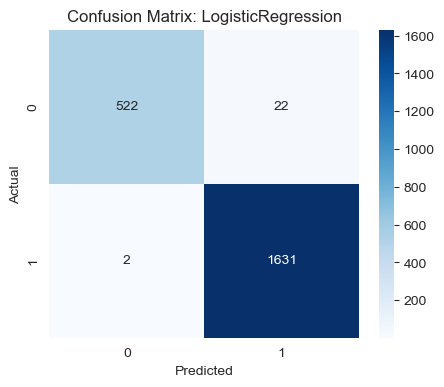

2025-01-04 03:57:20,315 - __main__ - INFO - Confusion matrix saved to plots/confusion_matrix_LogisticRegression.png
2025-01-04 03:57:20,315 - __main__ - INFO - Confusion matrix saved to plots/confusion_matrix_LogisticRegression.png
2025-01-04 03:57:20,315 - __main__ - INFO - Confusion matrix saved to plots/confusion_matrix_LogisticRegression.png
2025-01-04 03:57:20,315 - __main__ - INFO - Confusion matrix saved to plots/confusion_matrix_LogisticRegression.png
2025-01-04 03:57:20,315 - __main__ - INFO - Confusion matrix saved to plots/confusion_matrix_LogisticRegression.png
2025-01-04 03:57:20,315 - __main__ - INFO - Confusion matrix saved to plots/confusion_matrix_LogisticRegression.png
2025-01-04 03:57:20,315 - __main__ - INFO - Confusion matrix saved to plots/confusion_matrix_LogisticRegression.png
2025-01-04 03:57:20,315 - __main__ - INFO - Confusion matrix saved to plots/confusion_matrix_LogisticRegression.png
2025-01-04 03:57:20,315 - __main__ - INFO - Confusion matrix saved to pl

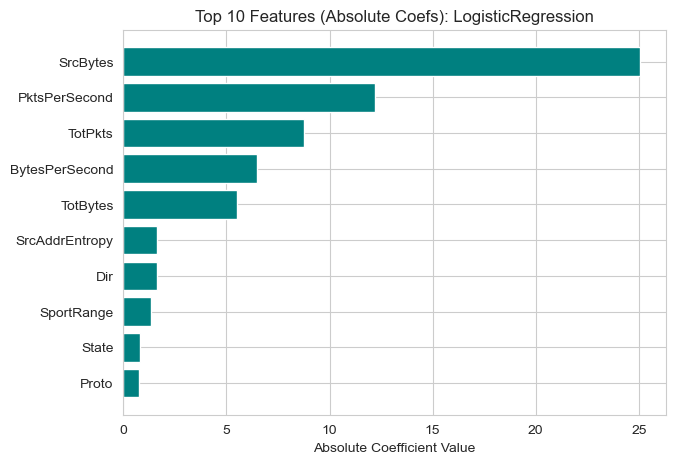

2025-01-04 03:57:20,499 - __main__ - INFO - Top 10 features bar chart saved to plots/top10_features_LogisticRegression.png
2025-01-04 03:57:20,499 - __main__ - INFO - Top 10 features bar chart saved to plots/top10_features_LogisticRegression.png
2025-01-04 03:57:20,499 - __main__ - INFO - Top 10 features bar chart saved to plots/top10_features_LogisticRegression.png
2025-01-04 03:57:20,499 - __main__ - INFO - Top 10 features bar chart saved to plots/top10_features_LogisticRegression.png
2025-01-04 03:57:20,499 - __main__ - INFO - Top 10 features bar chart saved to plots/top10_features_LogisticRegression.png
2025-01-04 03:57:20,499 - __main__ - INFO - Top 10 features bar chart saved to plots/top10_features_LogisticRegression.png
2025-01-04 03:57:20,499 - __main__ - INFO - Top 10 features bar chart saved to plots/top10_features_LogisticRegression.png
2025-01-04 03:57:20,499 - __main__ - INFO - Top 10 features bar chart saved to plots/top10_features_LogisticRegression.png
2025-01-04 03:57

Fitting 5 folds for each of 8 candidates, totalling 40 fits


2025-01-04 03:57:21,843 - __main__ - INFO - GradientBoosting -> Training time: 1.34 seconds
2025-01-04 03:57:21,843 - __main__ - INFO - GradientBoosting -> Training time: 1.34 seconds
2025-01-04 03:57:21,843 - __main__ - INFO - GradientBoosting -> Training time: 1.34 seconds
2025-01-04 03:57:21,843 - __main__ - INFO - GradientBoosting -> Training time: 1.34 seconds
2025-01-04 03:57:21,843 - __main__ - INFO - GradientBoosting -> Training time: 1.34 seconds
2025-01-04 03:57:21,843 - __main__ - INFO - GradientBoosting -> Training time: 1.34 seconds
2025-01-04 03:57:21,843 - __main__ - INFO - GradientBoosting -> Training time: 1.34 seconds
2025-01-04 03:57:21,843 - __main__ - INFO - GradientBoosting -> Training time: 1.34 seconds
2025-01-04 03:57:21,843 - __main__ - INFO - GradientBoosting -> Training time: 1.34 seconds
2025-01-04 03:57:21,843 - __main__ - INFO - GradientBoosting -> Training time: 1.34 seconds
2025-01-04 03:57:21,843 - __main__ - INFO - GradientBoosting -> Training time: 1

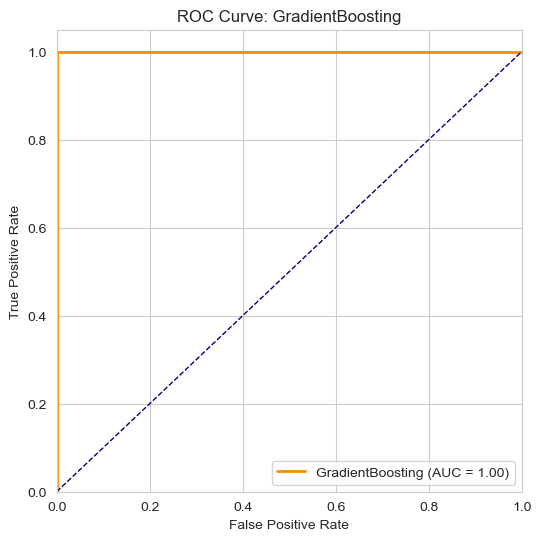

2025-01-04 03:57:22,039 - __main__ - INFO - ROC curve saved to plots/roc_GradientBoosting.png
2025-01-04 03:57:22,039 - __main__ - INFO - ROC curve saved to plots/roc_GradientBoosting.png
2025-01-04 03:57:22,039 - __main__ - INFO - ROC curve saved to plots/roc_GradientBoosting.png
2025-01-04 03:57:22,039 - __main__ - INFO - ROC curve saved to plots/roc_GradientBoosting.png
2025-01-04 03:57:22,039 - __main__ - INFO - ROC curve saved to plots/roc_GradientBoosting.png
2025-01-04 03:57:22,039 - __main__ - INFO - ROC curve saved to plots/roc_GradientBoosting.png
2025-01-04 03:57:22,039 - __main__ - INFO - ROC curve saved to plots/roc_GradientBoosting.png
2025-01-04 03:57:22,039 - __main__ - INFO - ROC curve saved to plots/roc_GradientBoosting.png
2025-01-04 03:57:22,039 - __main__ - INFO - ROC curve saved to plots/roc_GradientBoosting.png
2025-01-04 03:57:22,039 - __main__ - INFO - ROC curve saved to plots/roc_GradientBoosting.png
2025-01-04 03:57:22,039 - __main__ - INFO - ROC curve saved 

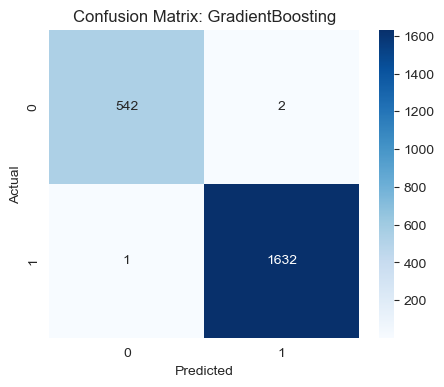

2025-01-04 03:57:22,149 - __main__ - INFO - Confusion matrix saved to plots/confusion_matrix_GradientBoosting.png
2025-01-04 03:57:22,149 - __main__ - INFO - Confusion matrix saved to plots/confusion_matrix_GradientBoosting.png
2025-01-04 03:57:22,149 - __main__ - INFO - Confusion matrix saved to plots/confusion_matrix_GradientBoosting.png
2025-01-04 03:57:22,149 - __main__ - INFO - Confusion matrix saved to plots/confusion_matrix_GradientBoosting.png
2025-01-04 03:57:22,149 - __main__ - INFO - Confusion matrix saved to plots/confusion_matrix_GradientBoosting.png
2025-01-04 03:57:22,149 - __main__ - INFO - Confusion matrix saved to plots/confusion_matrix_GradientBoosting.png
2025-01-04 03:57:22,149 - __main__ - INFO - Confusion matrix saved to plots/confusion_matrix_GradientBoosting.png
2025-01-04 03:57:22,149 - __main__ - INFO - Confusion matrix saved to plots/confusion_matrix_GradientBoosting.png
2025-01-04 03:57:22,149 - __main__ - INFO - Confusion matrix saved to plots/confusion_ma

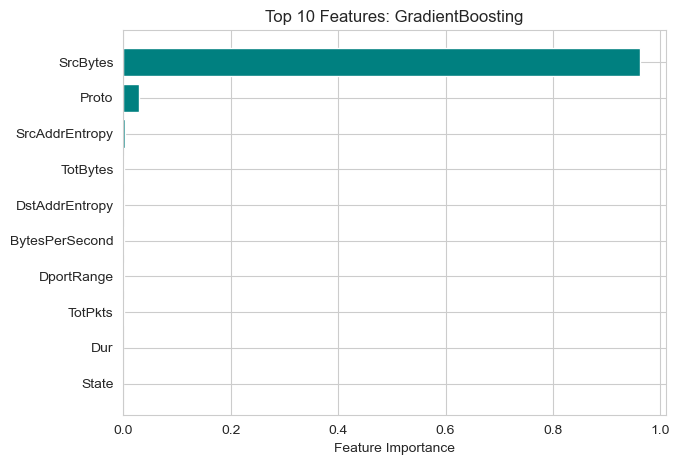

2025-01-04 03:57:22,339 - __main__ - INFO - Top 10 features bar chart saved to plots/top10_features_GradientBoosting.png
2025-01-04 03:57:22,339 - __main__ - INFO - Top 10 features bar chart saved to plots/top10_features_GradientBoosting.png
2025-01-04 03:57:22,339 - __main__ - INFO - Top 10 features bar chart saved to plots/top10_features_GradientBoosting.png
2025-01-04 03:57:22,339 - __main__ - INFO - Top 10 features bar chart saved to plots/top10_features_GradientBoosting.png
2025-01-04 03:57:22,339 - __main__ - INFO - Top 10 features bar chart saved to plots/top10_features_GradientBoosting.png
2025-01-04 03:57:22,339 - __main__ - INFO - Top 10 features bar chart saved to plots/top10_features_GradientBoosting.png
2025-01-04 03:57:22,339 - __main__ - INFO - Top 10 features bar chart saved to plots/top10_features_GradientBoosting.png
2025-01-04 03:57:22,339 - __main__ - INFO - Top 10 features bar chart saved to plots/top10_features_GradientBoosting.png
2025-01-04 03:57:22,339 - __main

In [119]:
logger.info("\n\nSECTION 5: TRAIN-TEST SPLIT AND MULTI-MODEL PIPELINE\n")

# Ensure a 'plots' folder exists for saving figures
os.makedirs("plots", exist_ok=True)

logger.info("Splitting dataset into train and test sets...")

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=TEST_SIZE,
    random_state=RANDOM_STATE,
    stratify=y  # Use stratify if class distribution is imbalanced
)

logger.info(f"Train set shape: {X_train.shape}, Test set shape: {X_test.shape}")

# Define your models and param grids
models_and_grids = {
    "RandomForest": {
        "model": RandomForestClassifier(random_state=RANDOM_STATE),
        "param_grid": {
            'clf__n_estimators': [50, 100],
            'clf__max_depth': [5, 10],
            'clf__min_samples_split': [2, 5],
            'clf__min_samples_leaf': [1, 2]
        }
    },
    "DecisionTree": {
        "model": DecisionTreeClassifier(random_state=RANDOM_STATE),
        "param_grid": {
            'clf__max_depth': [5, 10, None],
            'clf__min_samples_split': [2, 5],
            'clf__min_samples_leaf': [1, 2]
        }
    },
    "NaiveBayes": {
        "model": GaussianNB(),
        "param_grid": {
            'clf__var_smoothing': [1e-9, 1e-8, 1e-7]
        }
    },
    "KNN": {
        "model": KNeighborsClassifier(),
        "param_grid": {
            'clf__n_neighbors': [3, 5, 7],
            'clf__weights': ['uniform', 'distance']
        }
    },
    "SVM": {
         "model": SVC(random_state=RANDOM_STATE, probability=True),
         "param_grid": {
             'clf__C': [0.1, 1.0, 10.0],
             'clf__kernel': ['linear', 'rbf']
         }
     },
    "LogisticRegression": {
        "model": LogisticRegression(solver='liblinear', random_state=RANDOM_STATE),
        "param_grid": {
            'clf__C': [0.01, 0.1, 1, 10],
            'clf__penalty': ['l1', 'l2']
        }
    },
    "GradientBoosting": {
        "model": GradientBoostingClassifier(random_state=RANDOM_STATE),
        "param_grid": {
            'clf__n_estimators': [50, 100],
            'clf__learning_rate': [0.01, 0.1],
            'clf__max_depth': [3, 5]
        }
    }
}

results = {}

# Store the trained models
trained_models = {}


for model_name, model_info in models_and_grids.items():
    logger.info(f"Starting GridSearch for {model_name}...")

    # Build a pipeline: scaling + classifier
    pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('clf', model_info["model"])
    ])

    param_grid = model_info["param_grid"]

    # Setup GridSearch
    grid_search = GridSearchCV(
        pipeline,
        param_grid,
        scoring='f1',
        cv=5,
        n_jobs=-1,
        verbose=1
    )

    # Measure training time
    start_time = time.time()

    logger.info(f"Fitting {model_name} model with GridSearchCV...")
    grid_search.fit(X_train, y_train)

    train_time = time.time() - start_time
    logger.info(f"{model_name} -> Training time: {train_time:.2f} seconds")

    best_model = grid_search.best_estimator_

    # Evaluate on test set
    y_pred = best_model.predict(X_test)

    # Check for predict_proba
    has_predict_proba = hasattr(best_model, "predict_proba")

    # Compute basic metrics
    accuracy_val = accuracy_score(y_test, y_pred)
    precision_val = precision_score(y_test, y_pred)
    recall_val = recall_score(y_test, y_pred)
    f1_val = f1_score(y_test, y_pred)

    clf_report = classification_report(y_test, y_pred)
    logger.info(f"\nClassification Report for {model_name}:\n{clf_report}")

    logger.info(f"{model_name} -> Best Params: {grid_search.best_params_}")
    logger.info(f"{model_name} -> Best CV Score (F1): {grid_search.best_score_:.4f}")
    logger.info(f"{model_name} -> Test Accuracy: {accuracy_val:.4f}")
    logger.info(f"{model_name} -> Test Precision: {precision_val:.4f}")
    logger.info(f"{model_name} -> Test Recall: {recall_val:.4f}")
    logger.info(f"{model_name} -> Test F1 Score: {f1_val:.4f}")

        # ROC Curve & AUC
    roc_auc = None
    if has_predict_proba:
        y_prob = best_model.predict_proba(X_test)[:, 1]
        fpr, tpr, _ = roc_curve(y_test, y_prob)
        roc_auc = auc(fpr, tpr)

        logger.info(f"{model_name} -> Test ROC AUC: {roc_auc:.4f}")

        plt.figure(figsize=(6, 6))
        plt.plot(fpr, tpr, color='darkorange', lw=2, label=f"{model_name} (AUC = {roc_auc:.2f})")
        plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title(f"ROC Curve: {model_name}")
        plt.legend(loc="lower right")

        roc_filename = f"plots/roc_{model_name}.png"
        plt.savefig(roc_filename, dpi=300)
        plt.show()
        logger.info(f"ROC curve saved to {roc_filename}")
    else:
        logger.warning(f"{model_name} does not support predict_proba. Skipping ROC curve.")

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(5, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap='Blues')
    plt.title(f"Confusion Matrix: {model_name}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")

    cm_filename = f"plots/confusion_matrix_{model_name}.png"
    plt.savefig(cm_filename, dpi=300)
    plt.show()
    logger.info(f"Confusion matrix saved to {cm_filename}")

    # Top 10 Features
    # For tree-based models: 'feature_importances_'
    # For logistic regression: 'coef_'
    # For KNN, NB => not natively available.
    feature_names = list(X_train.columns)  # columns from your data
    top_10_features = None

    clf_step = best_model.named_steps['clf']  # the actual estimator

    if hasattr(clf_step, 'feature_importances_'):
        importances = clf_step.feature_importances_
        # Sort descending
        sorted_idx = np.argsort(importances)[::-1]
        top_idx = sorted_idx[:10]
        top_10_features = [(feature_names[i], importances[i]) for i in top_idx]

        logger.info(f"{model_name} -> Top 10 features (feature_importances_):")
        for feat, val in top_10_features:
            logger.info(f"  {feat}: {val:.4f}")

        # Create a bar chart
        plt.figure(figsize=(7, 5))
        # reverse order so largest is at top
        y_vals = [feature_names[i] for i in top_idx][::-1]
        x_vals = [importances[i] for i in top_idx][::-1]
        plt.barh(y_vals, x_vals, color='teal')
        plt.title(f"Top 10 Features: {model_name}")
        plt.xlabel("Feature Importance")

        feat_imp_filename = f"plots/top10_features_{model_name}.png"
        plt.savefig(feat_imp_filename, dpi=300)
        plt.show()
        logger.info(f"Top 10 features bar chart saved to {feat_imp_filename}")

    elif hasattr(clf_step, 'coef_'):
        coefs = clf_step.coef_[0]
        # Sort by absolute value
        sorted_idx = np.argsort(np.abs(coefs))[::-1]
        top_idx = sorted_idx[:10]
        top_10_features = [(feature_names[i], coefs[i]) for i in top_idx]

        logger.info(f"{model_name} -> Top 10 features (coef_):")
        for feat, val in top_10_features:
            logger.info(f"  {feat}: {val:.4f}")

        # Create a bar chart with absolute values
        plt.figure(figsize=(7, 5))
        y_vals = [feature_names[i] for i in top_idx][::-1]
        x_vals = [np.abs(coefs[i]) for i in top_idx][::-1]
        plt.barh(y_vals, x_vals, color='teal')
        plt.title(f"Top 10 Features (Absolute Coefs): {model_name}")
        plt.xlabel("Absolute Coefficient Value")

        feat_imp_filename = f"plots/top10_features_{model_name}.png"
        plt.savefig(feat_imp_filename, dpi=300)
        plt.show()
        logger.info(f"Top 10 features bar chart saved to {feat_imp_filename}")

    else:
        logger.warning(f"{model_name} does not provide feature_importances_ or coef_. Skipping top features graphic.")

    # Store results (metrics only)
    results[model_name] = {
        'best_params': grid_search.best_params_,
        'cv_f1': grid_search.best_score_,
        'test_accuracy': accuracy_val,
        'test_precision': precision_val,
        'test_recall': recall_val,
        'test_f1': f1_val,
        'test_roc_auc': roc_auc,
        'train_time_sec': train_time
    }

    # Store the actual best model object
    trained_models[model_name] = best_model

# Final summary
logger.info("All GridSearches complete. Summary of results:")
for model_name, res in results.items():
    logger.info(
        f"Model: {model_name}\n"
        f"  CV F1: {res['cv_f1']:.4f}\n"
        f"  Best Params: {res['best_params']}\n"
        f"  Test Accuracy: {res['test_accuracy']:.4f}\n"
        f"  Test Precision: {res['test_precision']:.4f}\n"
        f"  Test Recall: {res['test_recall']:.4f}\n"
        f"  Test F1: {res['test_f1']:.4f}\n"
        f"  Test ROC AUC: {res['test_roc_auc'] if res['test_roc_auc'] else 'N/A'}\n"
        f"  Train Time (s): {res['train_time_sec']:.2f}\n"
    )

### SECTION 6: EVALUATION OF THE BEST MODEL
---

In [120]:
logger.info("SECTION 6: MODEL COMPARISON AND RANKING")

# Convert 'results' dict to DataFrame
df_results = pd.DataFrame.from_dict(results, orient='index')
df_results.reset_index(inplace=True)
df_results.rename(columns={'index': 'Model'}, inplace=True)

# Sort by test_f1 descending
df_results.sort_values(by='test_f1', ascending=False, inplace=True)

# Rank
df_results['Rank'] = range(1, len(df_results) + 1)

# Log and print
logger.info("Comparison of all models, sorted by Test F1 (descending):")
logger.info(f"\n{df_results.to_markdown(index=False)}")

logger.info("Comparison of all models, sorted by Test F1 (descending):")
logger.info(df_results.to_markdown(index=False))

# Identify best model
best_model_name = df_results.iloc[0]['Model']
best_model_f1 = df_results.iloc[0]['test_f1']
logger.info(f"Best model according to Test F1 is {best_model_name} with F1={best_model_f1:.4f}")

best_model_params = df_results.iloc[0]['best_params']
logger.info(f"Best model hyperparameters: {best_model_params}")

# Retrieve the ACTUAL best model object
best_model_object = trained_models[best_model_name]
logger.info(f"Retrieved best model object for {best_model_name}")

2025-01-04 03:57:22,411 - __main__ - INFO - SECTION 6: MODEL COMPARISON AND RANKING
2025-01-04 03:57:22,411 - __main__ - INFO - SECTION 6: MODEL COMPARISON AND RANKING
2025-01-04 03:57:22,411 - __main__ - INFO - SECTION 6: MODEL COMPARISON AND RANKING
2025-01-04 03:57:22,411 - __main__ - INFO - SECTION 6: MODEL COMPARISON AND RANKING
2025-01-04 03:57:22,411 - __main__ - INFO - SECTION 6: MODEL COMPARISON AND RANKING
2025-01-04 03:57:22,411 - __main__ - INFO - SECTION 6: MODEL COMPARISON AND RANKING
2025-01-04 03:57:22,411 - __main__ - INFO - SECTION 6: MODEL COMPARISON AND RANKING
2025-01-04 03:57:22,411 - __main__ - INFO - SECTION 6: MODEL COMPARISON AND RANKING
2025-01-04 03:57:22,411 - __main__ - INFO - SECTION 6: MODEL COMPARISON AND RANKING
2025-01-04 03:57:22,411 - __main__ - INFO - SECTION 6: MODEL COMPARISON AND RANKING
2025-01-04 03:57:22,411 - __main__ - INFO - SECTION 6: MODEL COMPARISON AND RANKING
2025-01-04 03:57:22,411 - __main__ - INFO - SECTION 6: MODEL COMPARISON AND 

In [121]:
speak_message("Code run complete. Check the logs for details.")